In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('refined.csv')

data.head()

,ID,Paper Title,Publication Year,Author Keywords,Article Citation Count,Authors with Affiliations
0,1,Semantically Enhanced Software Traceability Us...,2017,Traceability;Deep Learning;Recurrent Neural Ne...,147.0,"J. Guo (University of Notre Dame, IN, USA); J...."
1,2,Can Latent Topics in Source Code Predict Missi...,2017,Architectural design and implementation;tactic...,8.0,R. Gopalakrishnan (Rochester Institute of Tech...
2,3,Analyzing APIs Documentation and Code to Detec...,2017,API documentation;static analysis;natural lang...,66.0,"Y. Zhou (College of Computer Science, Nanjing ..."
3,4,An Unsupervised Approach for Discovering Relev...,2017,Application Programming Interface;PageRank Alg...,43.0,H. Jiang (State Key Laboratory of Software Eng...
4,5,Detecting User Story Information in Developer-...,2017,developer communication;user story generation;...,40.0,P. Rodeghero (Department of Computer Science a...


In [ ]:

missing_data = data.isnull().sum()

duplicate_rows = data.duplicated().sum()

missing_data, duplicate_rows

(ID                           0
 Paper Title                  0
 Publication Year             0
 Author Keywords              0
 Article Citation Count       2
 Authors with Affiliations    0
 dtype: int64,
 0)

In [ ]:

data['Author Keywords'].fillna("Unknown", inplace=True)
data['Article Citation Count'].fillna(0, inplace=True)
data.dropna(subset=['Authors with Affiliations'], inplace=True)
missing_data_after_cleaning = data.isnull().sum()

missing_data_after_cleaning


ID                           0
Paper Title                  0
Publication Year             0
Author Keywords              0
Article Citation Count       0
Authors with Affiliations    0
dtype: int64

In [ ]:

def categorize_time_period(year):
    if year < 2020:
        return "Pre-COVID"
    elif year == 2020:
        return "During COVID"
    else:
        return "Post-COVID"

data['Time Period'] = data['Publication Year'].apply(categorize_time_period)

time_period_distribution = data['Time Period'].value_counts()

time_period_distribution


Post-COVID      545
Pre-COVID       330
During COVID    129
Name: Time Period, dtype: int64

In [ ]:
import re


def extract_authors_affiliations(text):
    """
    Extract authors and affiliations from the 'Authors with Affiliations' column.
    """
    author_affiliation_pairs = text.split(';')

    authors = []
    affiliations = []

    for pair in author_affiliation_pairs:
        match = re.match(r'^(.*?)\s*\((.*?)\)$', pair.strip())
        if match:
            authors.append(match.group(1).strip())
            affiliations.append(match.group(2).strip())

    return authors, affiliations

data['Authors'], data['Affiliations'] = zip(*data['Authors with Affiliations'].apply(extract_authors_affiliations))

data[['Authors', 'Affiliations']].head()


,Authors,Affiliations
0,"[J. Guo, J. Cheng, J. Cleland-Huang]","[University of Notre Dame, IN, USA, University..."
1,"[R. Gopalakrishnan, P. Sharma, M. Mirakhorli, ...","[Rochester Institute of Technology, USA, Roche..."
2,"[Y. Zhou, R. Gu, T. Chen, Z. Huang, S. Paniche...","[College of Computer Science, Nanjing Universi..."
3,"[H. Jiang, J. Zhang, Z. Ren, T. Zhang]","[State Key Laboratory of Software Engineering,..."
4,"[P. Rodeghero, S. Jiang, A. Armaly, C. McMillan]",[Department of Computer Science and Engineerin...


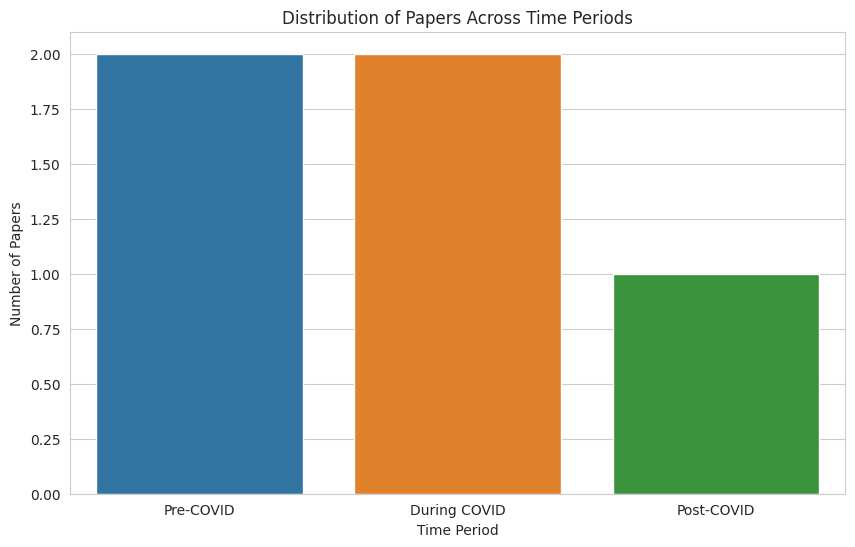

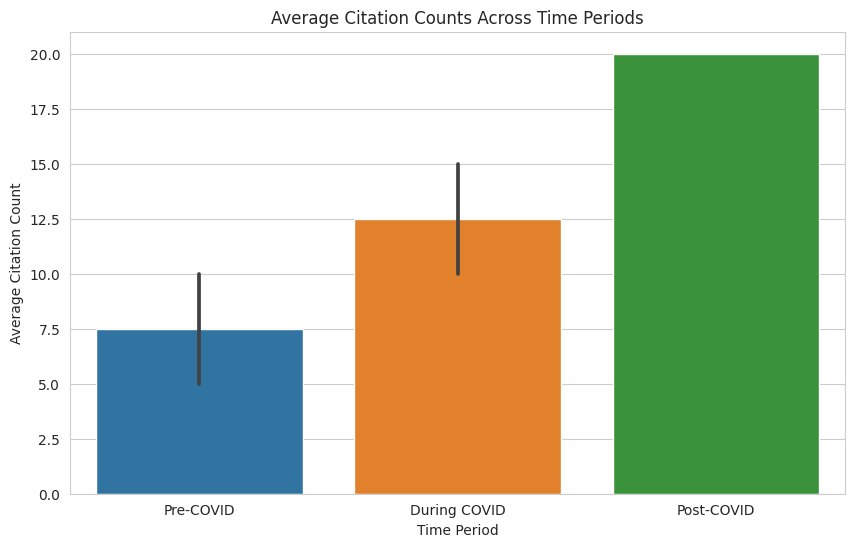

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style("whitegrid")

data = {
    'Time Period': ['Pre-COVID', 'During COVID', 'Post-COVID', 'Pre-COVID', 'During COVID'],
    'Article Citation Count': [10, 15, 20, 5, 10]
}
data = pd.DataFrame(data)


plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Time Period', order=['Pre-COVID', 'During COVID', 'Post-COVID'])
plt.title('Distribution of Papers Across Time Periods')
plt.ylabel('Number of Papers')
plt.savefig("distribution_of_papers.jpeg", format="jpeg")
plt.show()  # Display the plot

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Time Period', y='Article Citation Count', order=['Pre-COVID', 'During COVID', 'Post-COVID'])
plt.title('Average Citation Counts Across Time Periods')
plt.ylabel('Average Citation Count')
plt.savefig("average_citation_counts.jpeg", format="jpeg")
plt.show()  # Display the plot


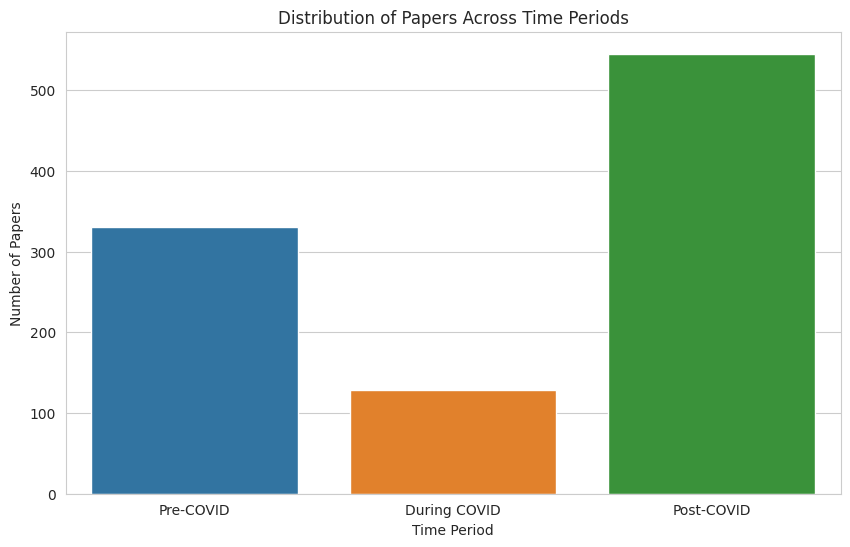

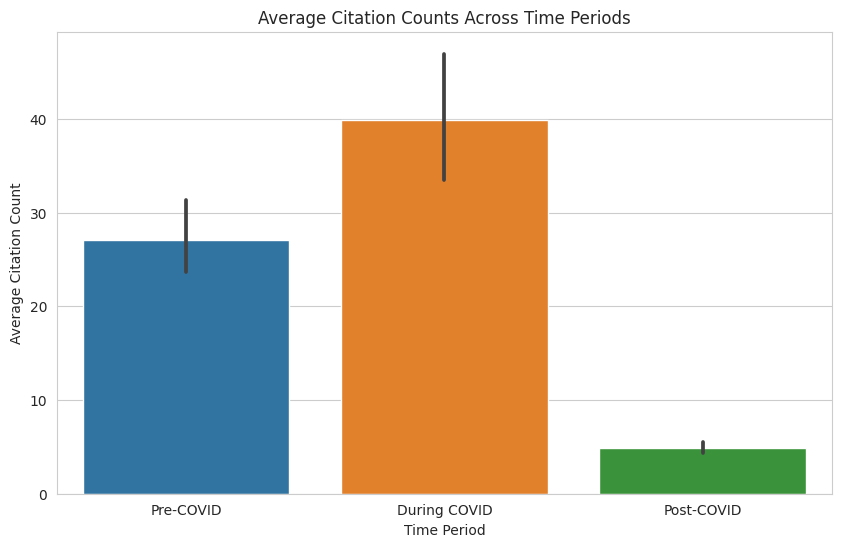

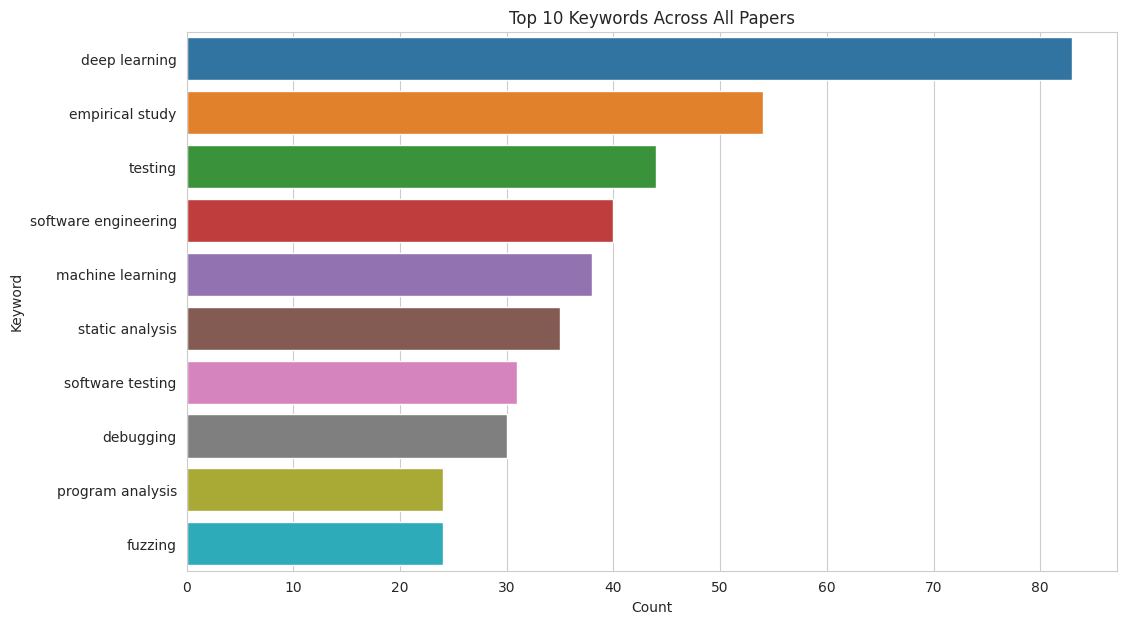

(   ID                                        Paper Title  Publication Year  \
 0   1  Semantically Enhanced Software Traceability Us...              2017   
 1   2  Can Latent Topics in Source Code Predict Missi...              2017   
 2   3  Analyzing APIs Documentation and Code to Detec...              2017   
 3   4  An Unsupervised Approach for Discovering Relev...              2017   
 4   5  Detecting User Story Information in Developer-...              2017   
 
                                      Author Keywords  Article Citation Count  \
 0  Traceability;Deep Learning;Recurrent Neural Ne...                   147.0   
 1  Architectural design and implementation;tactic...                     8.0   
 2  API documentation;static analysis;natural lang...                    66.0   
 3  Application Programming Interface;PageRank Alg...                    43.0   
 4  developer communication;user story generation;...                    40.0   
 
                            Authors 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

data = pd.read_csv('refined.csv')

data_head = data.head()

missing_data = data.isnull().sum()

duplicate_rows = data.duplicated().sum()

data['Author Keywords'].fillna("Unknown", inplace=True)
data['Article Citation Count'].fillna(0, inplace=True)
data.dropna(subset=['Authors with Affiliations'], inplace=True)

missing_data_after_cleaning = data.isnull().sum()

def categorize_time_period(year):
    if year < 2020:
        return "Pre-COVID"
    elif year == 2020:
        return "During COVID"
    else:
        return "Post-COVID"

data['Time Period'] = data['Publication Year'].apply(categorize_time_period)

time_period_distribution = data['Time Period'].value_counts()

def extract_authors_affiliations(text):
    """
    Extract authors and affiliations from the 'Authors with Affiliations' column.
    """
    author_affiliation_pairs = text.split(';')

    authors = []
    affiliations = []

    for pair in author_affiliation_pairs:
        match = re.match(r'^(.*?)\s*\((.*?)\)$', pair.strip())
        if match:
            authors.append(match.group(1).strip())
            affiliations.append(match.group(2).strip())

    return authors, affiliations

data['Authors'], data['Affiliations'] = zip(*data['Authors with Affiliations'].apply(extract_authors_affiliations))

authors_affiliations_head = data[['Authors', 'Affiliations']].head()


sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Time Period', order=['Pre-COVID', 'During COVID', 'Post-COVID'])
plt.title('Distribution of Papers Across Time Periods')
plt.ylabel('Number of Papers')
plt.savefig("distribution_of_papers.jpeg", format="jpeg")
plt.show()  # Display the plot

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Time Period', y='Article Citation Count', order=['Pre-COVID', 'During COVID', 'Post-COVID'])
plt.title('Average Citation Counts Across Time Periods')
plt.ylabel('Average Citation Count')
plt.savefig("average_citation_counts.jpeg", format="jpeg")
plt.show()  # Display the plot


keywords_counter = Counter()
for keywords in data['Author Keywords']:
    for keyword in keywords.split(';'):
        keywords_counter[keyword.strip().lower()] += 1

top_keywords = keywords_counter.most_common(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=[count for keyword, count in top_keywords],
            y=[keyword for keyword, count in top_keywords])
plt.title('Top 10 Keywords Across All Papers')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

data_head, (missing_data, duplicate_rows), missing_data_after_cleaning, time_period_distribution, authors_affiliations_head


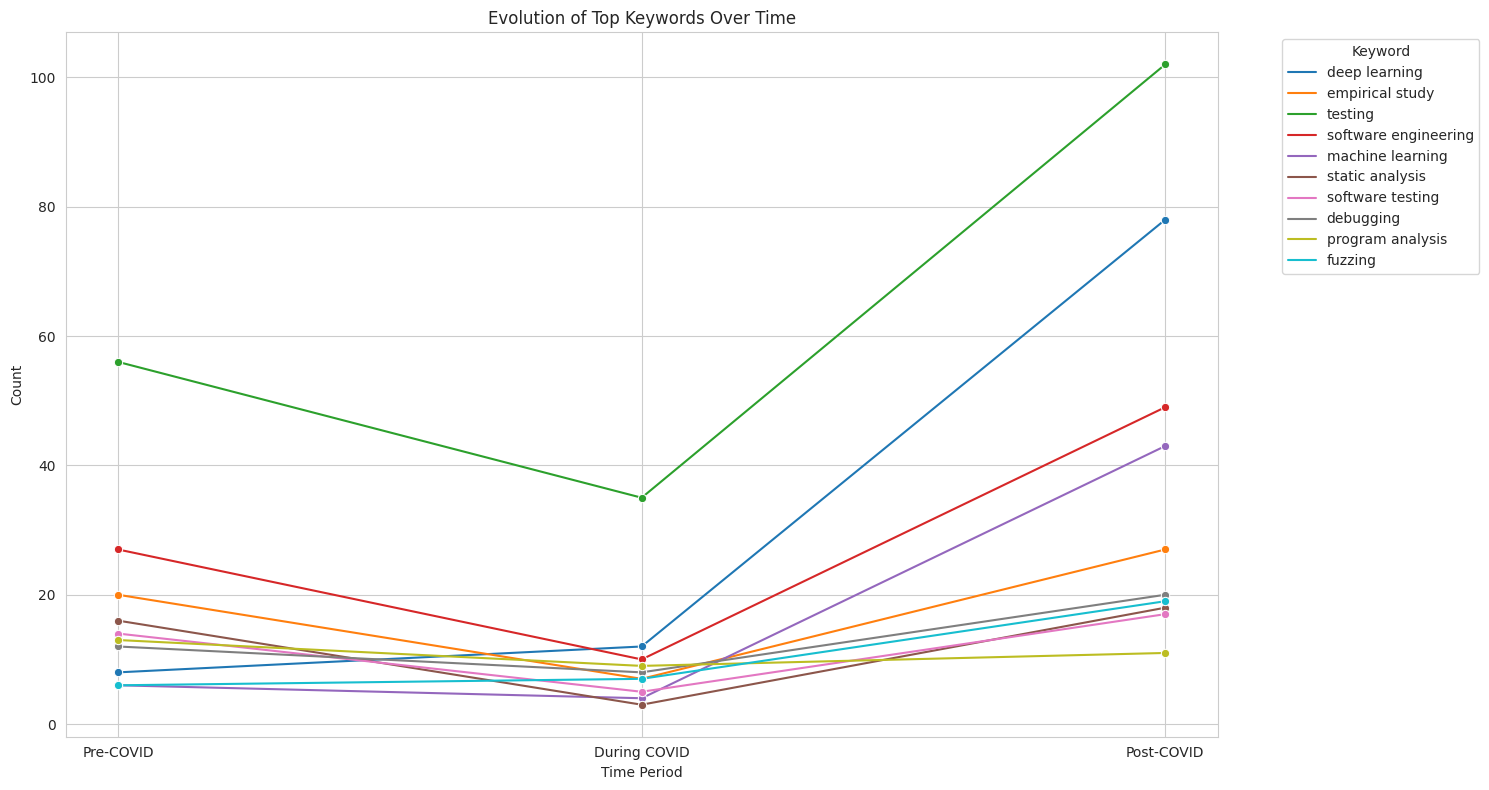

In [ ]:

keywords_over_time = pd.DataFrame(columns=['Keyword', 'Time Period', 'Count'])

for keyword, _ in top_keywords:
    for period in ['Pre-COVID', 'During COVID', 'Post-COVID']:
        count = sum(data[data['Time Period'] == period]['Author Keywords'].str.contains(keyword, case=False, na=False))
        keywords_over_time = keywords_over_time.append({
            'Keyword': keyword,
            'Time Period': period,
            'Count': count
        }, ignore_index=True)

plt.figure(figsize=(15, 8))
sns.lineplot(data=keywords_over_time, x='Time Period', y='Count', hue='Keyword', marker="o")
plt.title('Evolution of Top Keywords Over Time')
plt.ylabel('Count')
plt.legend(title='Keyword', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


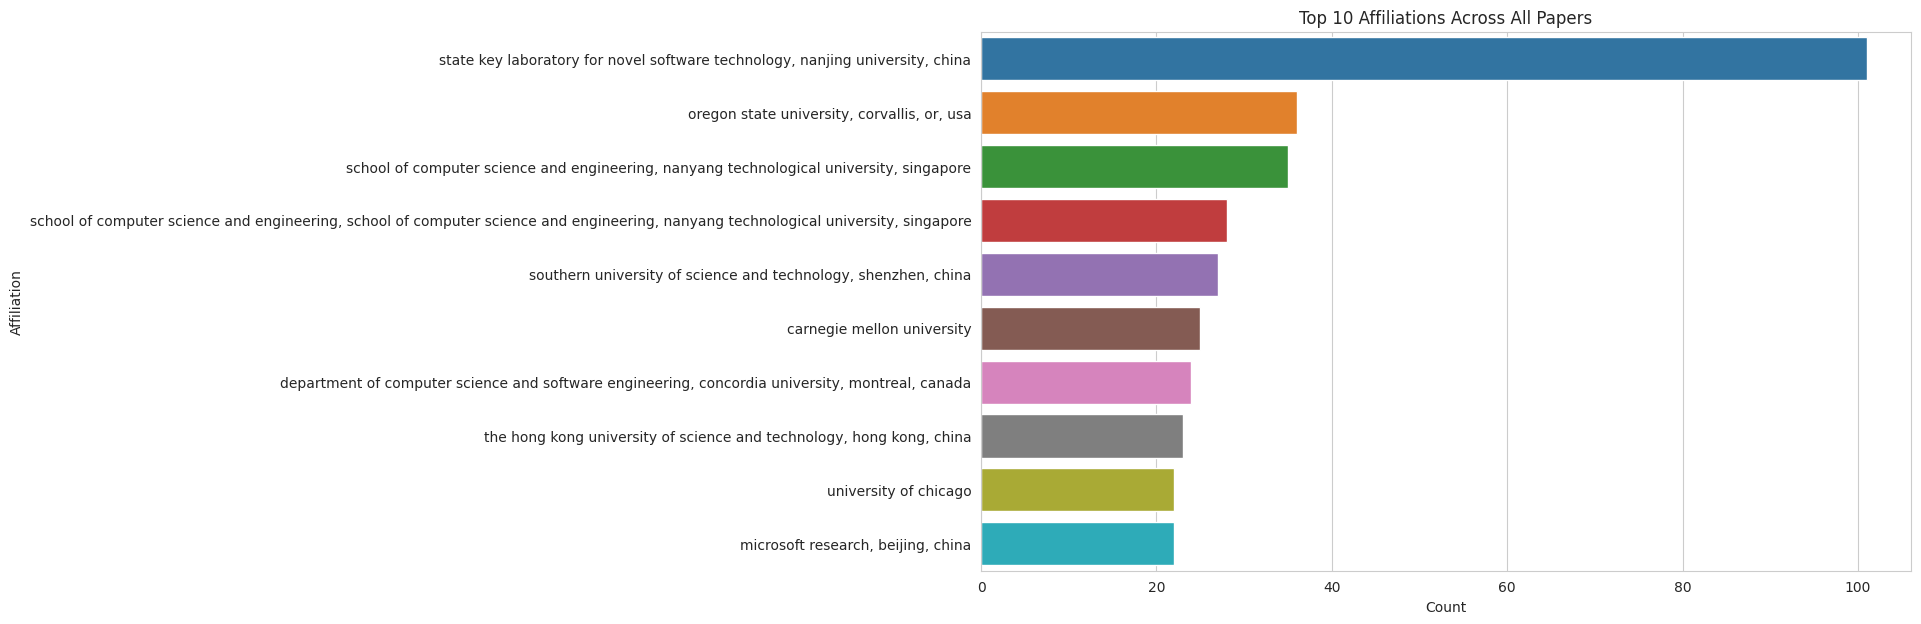

In [ ]:

affiliations_counter = Counter()
for affiliations in data['Affiliations']:
    for affiliation in affiliations:
        affiliations_counter[affiliation.lower()] += 1

top_affiliations = affiliations_counter.most_common(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=[count for affiliation, count in top_affiliations],
            y=[affiliation for affiliation, count in top_affiliations])
plt.title('Top 10 Affiliations Across All Papers')
plt.xlabel('Count')
plt.ylabel('Affiliation')
plt.show()


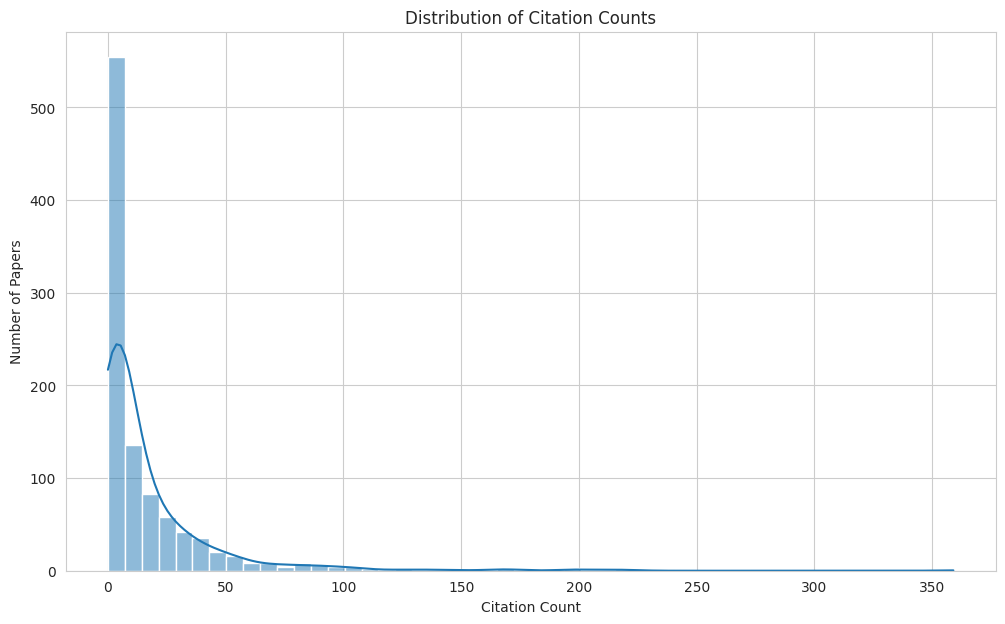

,Paper Title,Article Citation Count
102,DeepTest: Automated Testing of Deep-Neural-Net...,359.0
53,Evaluating and Improving Fault Localization,221.0
234,A Novel Neural Source Code Representation Base...,216.0
373,Empirical Review of Automated Analysis Tools o...,212.0
417,Big Code != Big Vocabulary: Open-Vocabulary Mo...,198.0


In [ ]:

plt.figure(figsize=(12, 7))
sns.histplot(data=data, x='Article Citation Count', bins=50, kde=True)
plt.title('Distribution of Citation Counts')
plt.xlabel('Citation Count')
plt.ylabel('Number of Papers')
plt.show()

top_cited_papers = data.sort_values(by='Article Citation Count', ascending=False).head(5)
top_cited_papers[['Paper Title', 'Article Citation Count']]


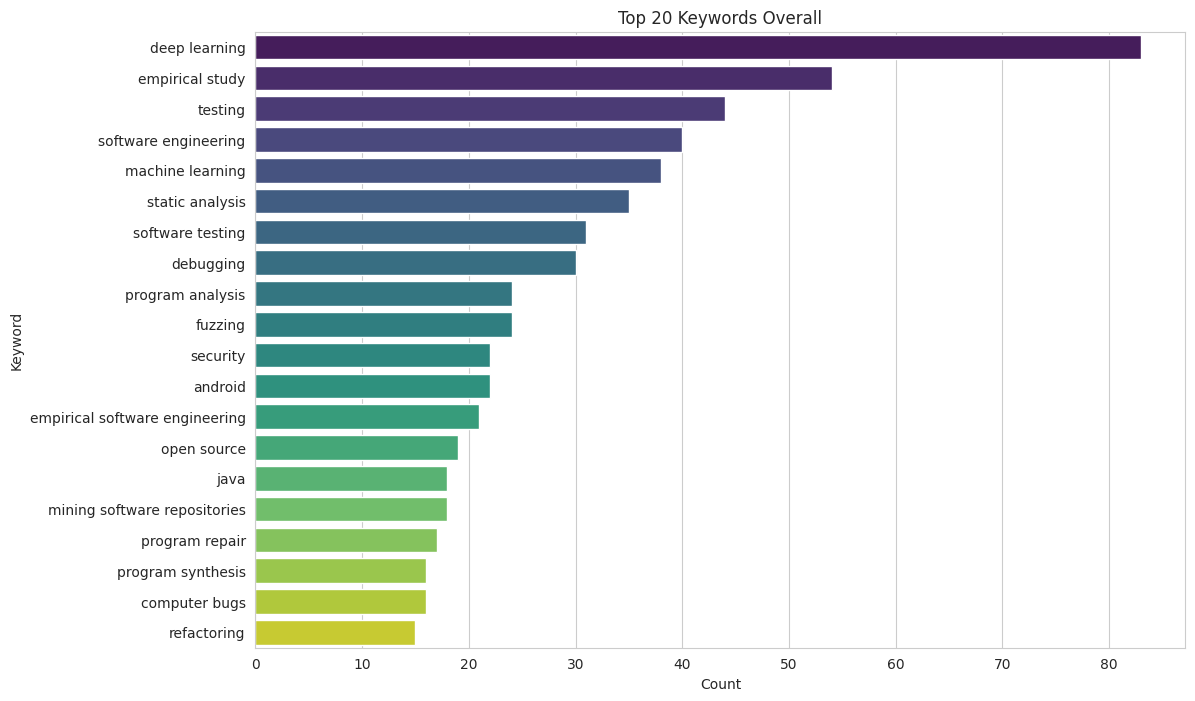

In [ ]:
from collections import Counter


def extract_keywords(keywords):
    return [keyword.strip().lower() for keyword in keywords.split(';')]

keywords_list = data['Author Keywords'].apply(extract_keywords).explode().tolist()
keyword_counts = Counter(keywords_list)

top_keywords = keyword_counts.most_common(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=[count for _, count in top_keywords], y=[keyword for keyword, _ in top_keywords], palette='viridis')
plt.title('Top 20 Keywords Overall')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()


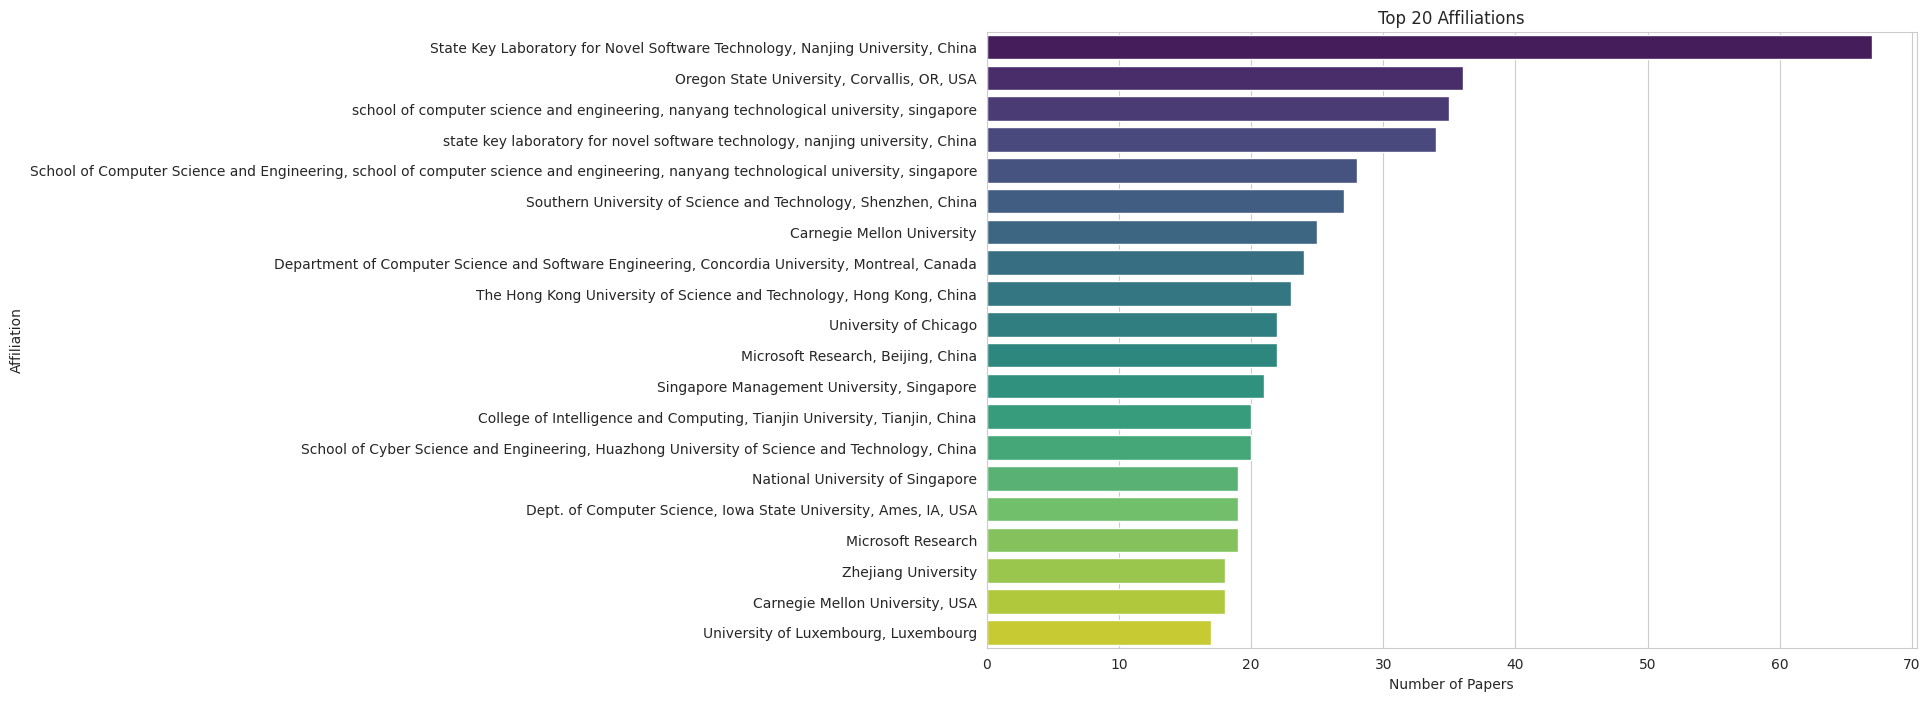

In [ ]:

affiliations_list = data['Affiliations'].explode().tolist()
affiliation_counts = Counter(affiliations_list)

top_affiliations = affiliation_counts.most_common(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=[count for _, count in top_affiliations], y=[affiliation for affiliation, _ in top_affiliations], palette='viridis')
plt.title('Top 20 Affiliations')
plt.xlabel('Number of Papers')
plt.ylabel('Affiliation')
plt.show()


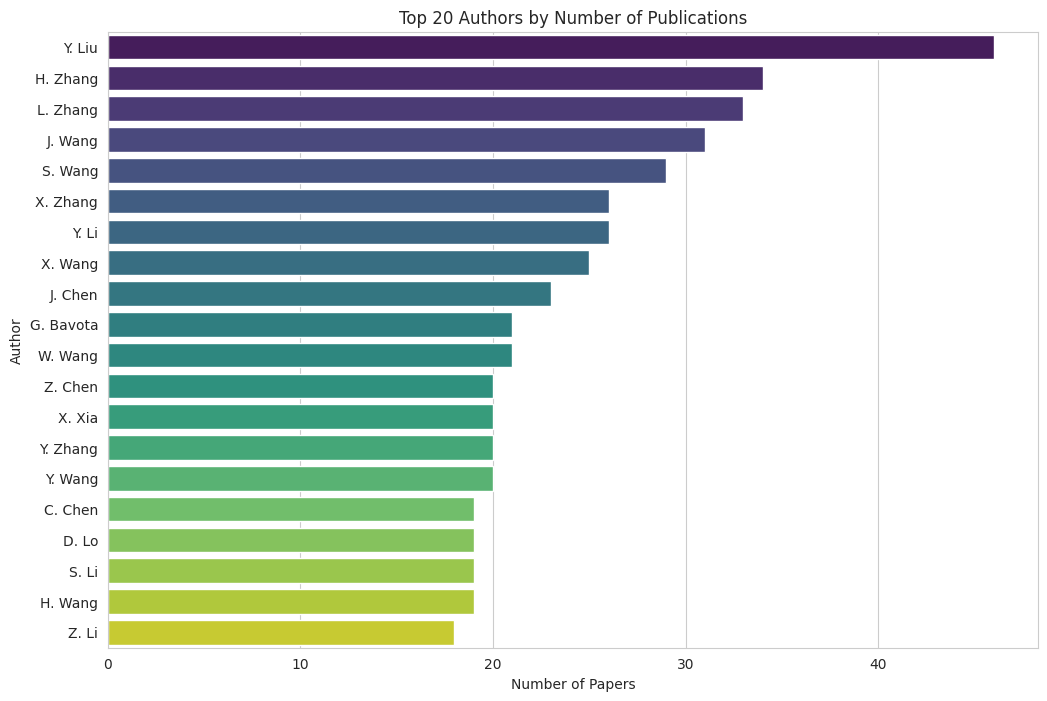

In [ ]:

authors_list = data['Authors'].explode().tolist()
author_counts = Counter(authors_list)

top_authors = author_counts.most_common(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=[count for _, count in top_authors], y=[author for author, _ in top_authors], palette='viridis')
plt.title('Top 20 Authors by Number of Publications')
plt.xlabel('Number of Papers')
plt.ylabel('Author')
plt.show()


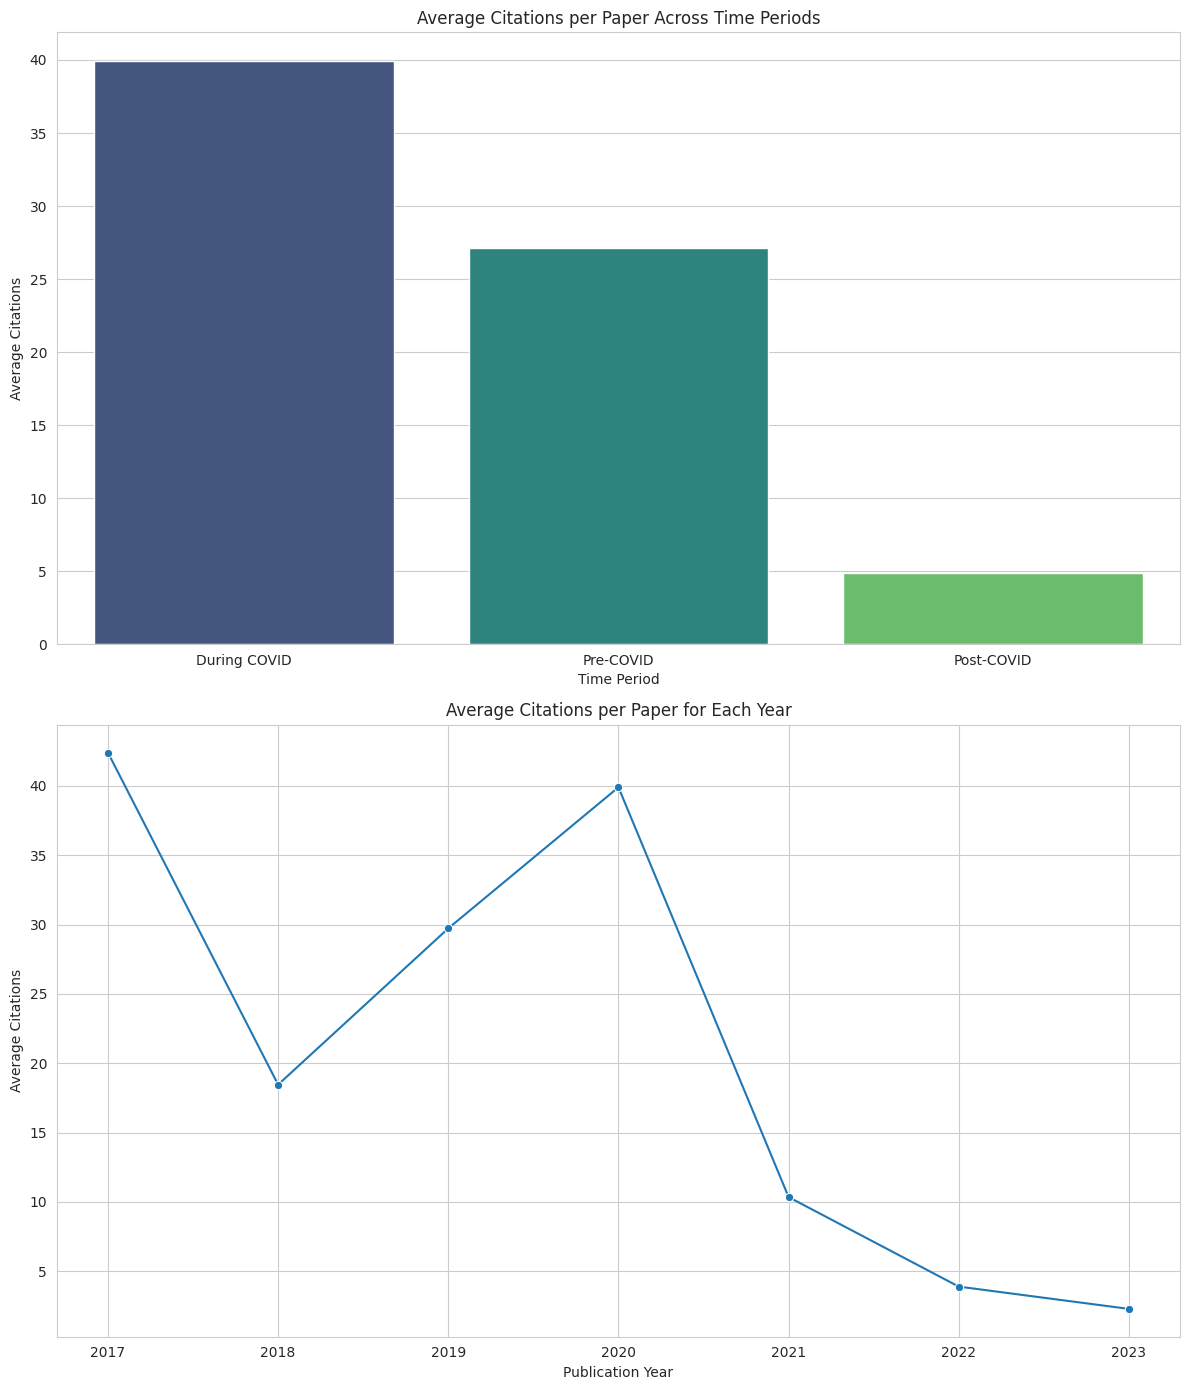

In [ ]:

avg_citations_time_period = data.groupby('Time Period')['Article Citation Count'].mean().sort_values(ascending=False)

avg_citations_yearly = data.groupby('Publication Year')['Article Citation Count'].mean()

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 14))

sns.barplot(x=avg_citations_time_period.index, y=avg_citations_time_period.values, ax=ax[0], palette='viridis')
ax[0].set_title('Average Citations per Paper Across Time Periods')
ax[0].set_ylabel('Average Citations')

sns.lineplot(x=avg_citations_yearly.index, y=avg_citations_yearly.values, ax=ax[1], marker='o')
ax[1].set_title('Average Citations per Paper for Each Year')
ax[1].set_ylabel('Average Citations')

plt.tight_layout()
plt.show()


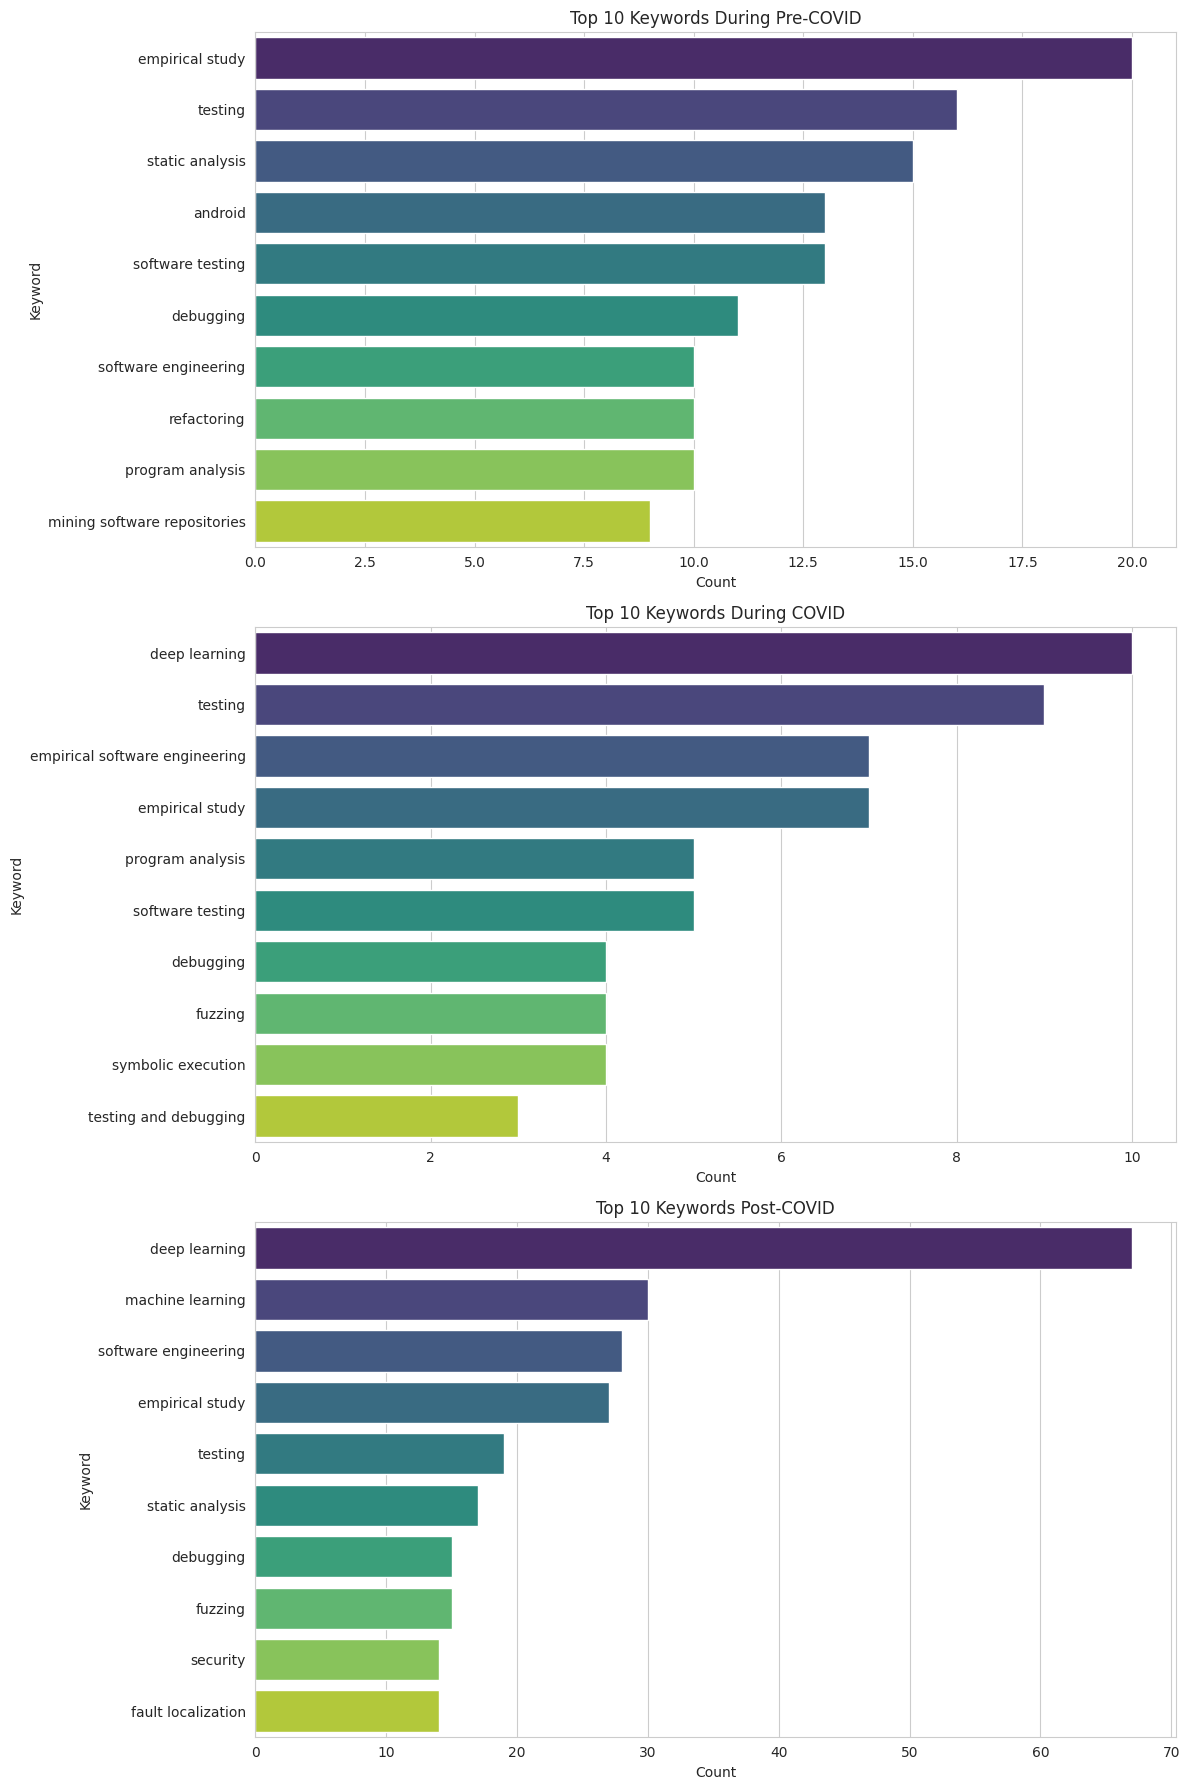

In [ ]:

def top_keywords_for_period(data, period, top_n=10):
    keywords_list = data[data['Time Period'] == period]['Author Keywords'].apply(extract_keywords).explode().tolist()
    keyword_counts = Counter(keywords_list)
    return keyword_counts.most_common(top_n)

pre_covid_keywords = top_keywords_for_period(data, 'Pre-COVID')
during_covid_keywords = top_keywords_for_period(data, 'During COVID')
post_covid_keywords = top_keywords_for_period(data, 'Post-COVID')

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

sns.barplot(x=[count for _, count in pre_covid_keywords], y=[keyword for keyword, _ in pre_covid_keywords], ax=axs[0], palette='viridis')
axs[0].set_title('Top 10 Keywords During Pre-COVID')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Keyword')

sns.barplot(x=[count for _, count in during_covid_keywords], y=[keyword for keyword, _ in during_covid_keywords], ax=axs[1], palette='viridis')
axs[1].set_title('Top 10 Keywords During COVID')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Keyword')

sns.barplot(x=[count for _, count in post_covid_keywords], y=[keyword for keyword, _ in post_covid_keywords], ax=axs[2], palette='viridis')
axs[2].set_title('Top 10 Keywords Post-COVID')
axs[2].set_xlabel('Count')
axs[2].set_ylabel('Keyword')

plt.tight_layout()
plt.show()


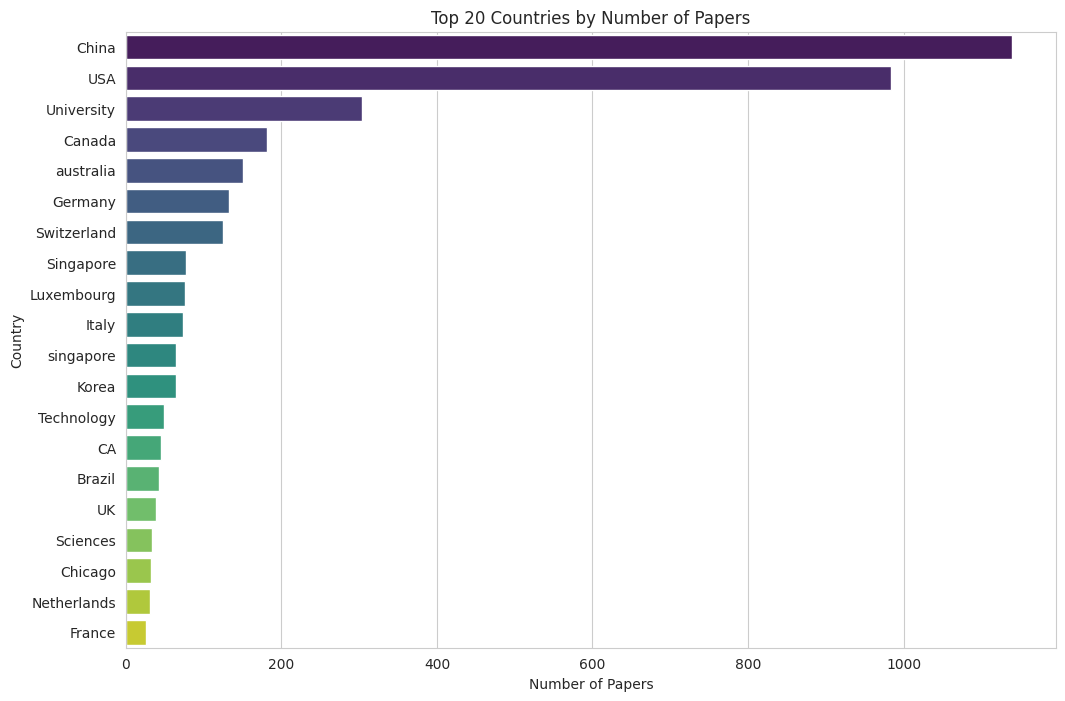

In [ ]:

data['Countries'] = data['Affiliations'].apply(lambda x: [affiliation.split()[-1] for affiliation in x])

countries_list = data['Countries'].explode().tolist()
country_counts = Counter(countries_list)

top_countries = country_counts.most_common(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=[count for _, count in top_countries], y=[country for country, _ in top_countries], palette='viridis')
plt.title('Top 20 Countries by Number of Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Country')
plt.show()


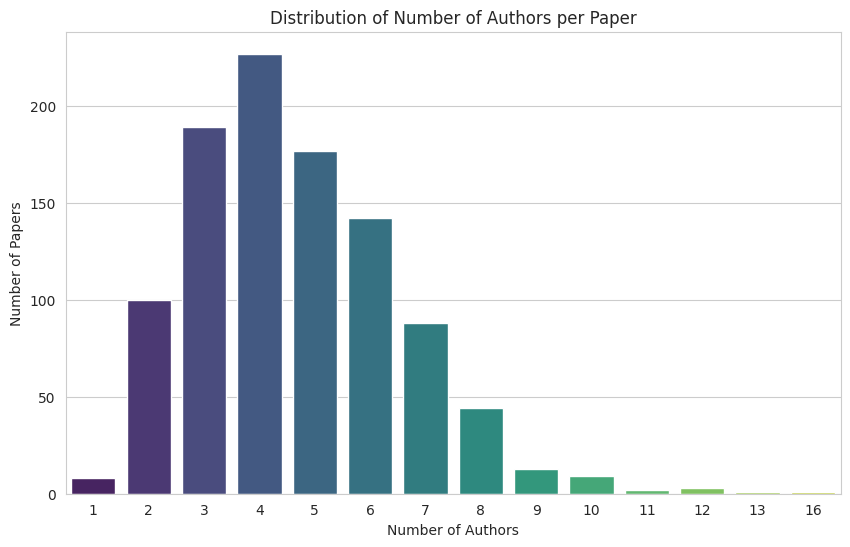

In [ ]:

data['Num_Authors'] = data['Authors'].apply(len)

plt.figure(figsize=(10, 6))
sns.countplot(x='Num_Authors', data=data, palette='viridis')
plt.title('Distribution of Number of Authors per Paper')
plt.ylabel('Number of Papers')
plt.xlabel('Number of Authors')
plt.show()


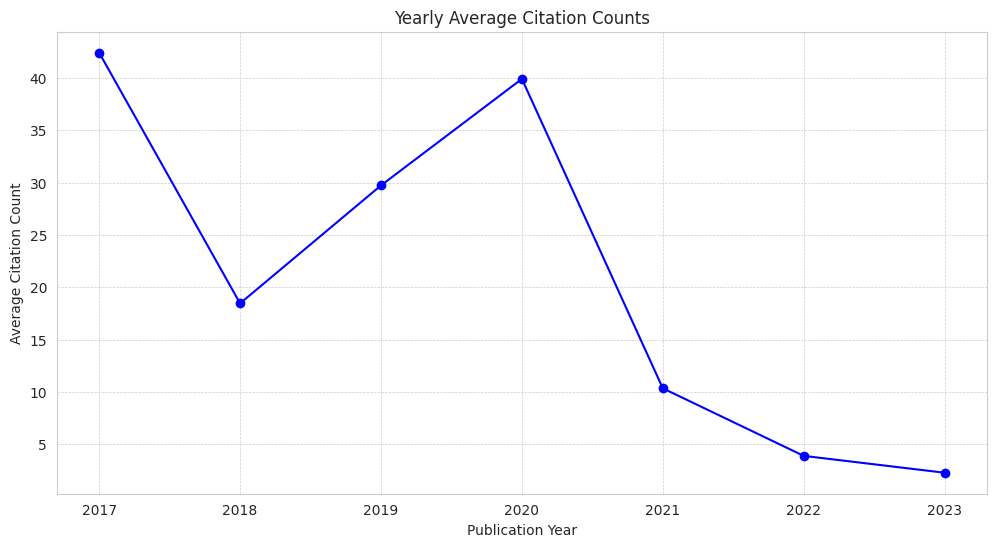

In [ ]:

yearly_citations = data.groupby('Publication Year')['Article Citation Count'].mean()

plt.figure(figsize=(12, 6))
yearly_citations.plot(kind='line', marker='o', color='blue')
plt.title('Yearly Average Citation Counts')
plt.ylabel('Average Citation Count')
plt.xlabel('Publication Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


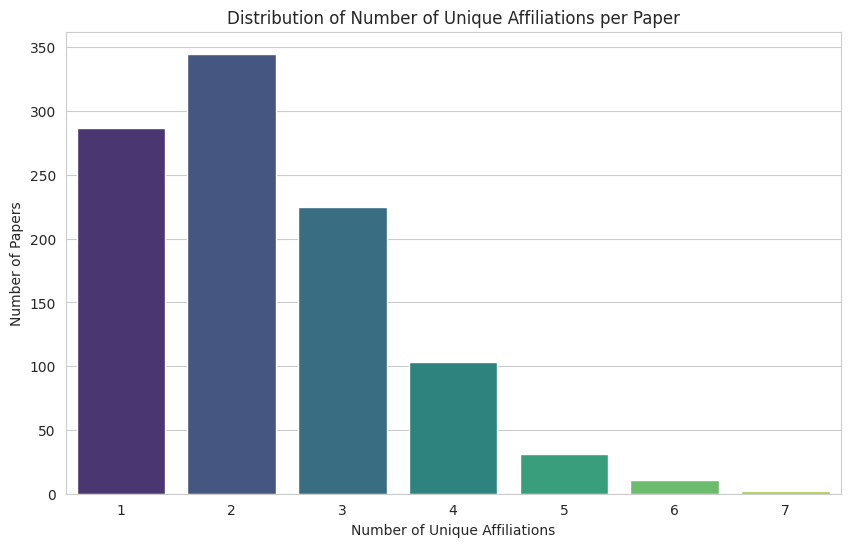

In [ ]:

data['Num_Unique_Affiliations'] = data['Affiliations'].apply(lambda x: len(set(x)))

plt.figure(figsize=(10, 6))
sns.countplot(x='Num_Unique_Affiliations', data=data, palette='viridis')
plt.title('Distribution of Number of Unique Affiliations per Paper')
plt.ylabel('Number of Papers')
plt.xlabel('Number of Unique Affiliations')
plt.show()


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    return ' '.join([lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words])

data['Processed Titles'] = data['Paper Title'].apply(preprocess_text)

vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000)
X = vectorizer.fit_transform(data['Processed Titles'])

num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42).fit(X)

def get_top_keywords_for_topic(model, feature_names, n_words):
    keywords_for_topics = {}
    for topic_idx, topic in enumerate(model.components_):
        keywords_for_topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]
    return keywords_for_topics

feature_names = vectorizer.get_feature_names_out()
top_keywords = get_top_keywords_for_topic(lda_model, feature_names, 10)

top_keywords


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


{0: ['code',
  'study',
  'empirical',
  'source',
  'review',
  'software',
  'vulnerability',
  'open',
  'security',
  'android'],
 1: ['learning',
  'software',
  'deep',
  'system',
  'code',
  'model',
  'via',
  'test',
  'analysis',
  'neural'],
 2: ['software',
  'developer',
  'program',
  'data',
  'execution',
  'automated',
  'analysis',
  'library',
  'symbolic',
  'study'],
 3: ['testing',
  'android',
  'api',
  'detecting',
  'analysis',
  'apps',
  'via',
  'graph',
  'detection',
  'differential'],
 4: ['program',
  'repair',
  'automated',
  'generation',
  'test',
  'first',
  'journal',
  'mobile',
  'approach',
  'model']}

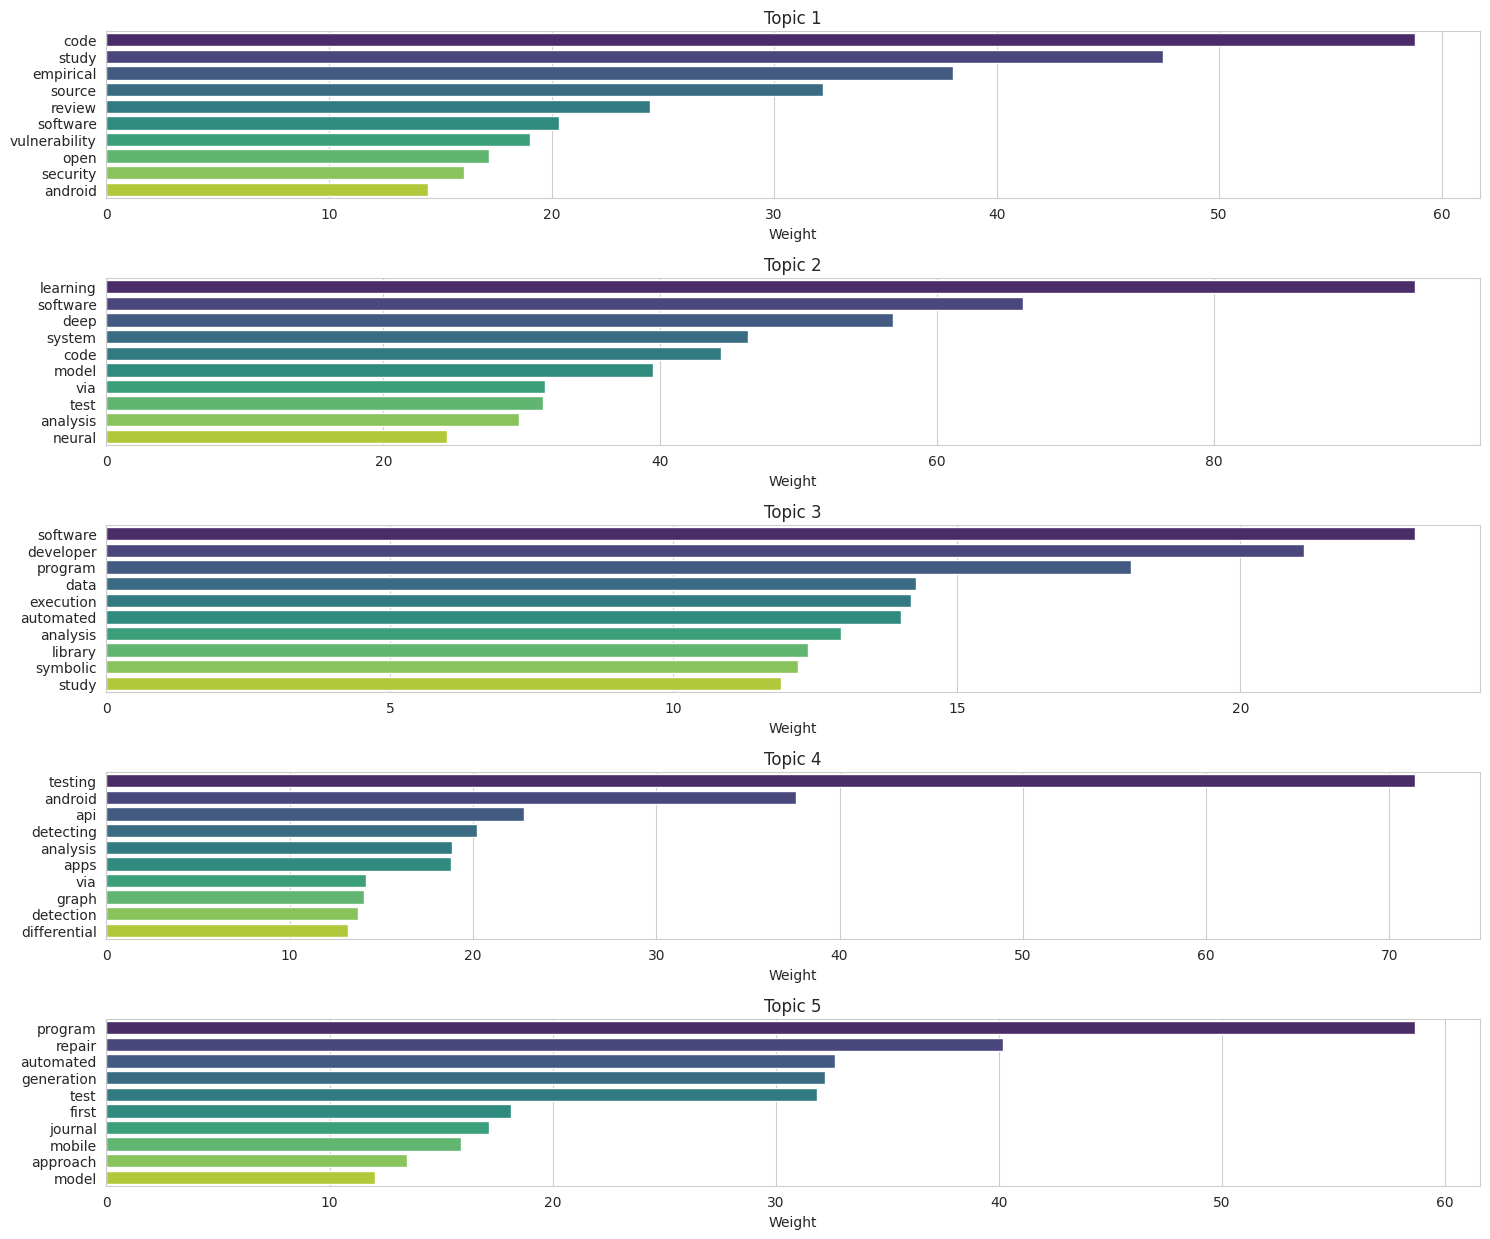

In [ ]:
num_top_words = 10

fig, axes = plt.subplots(nrows=num_topics, figsize=(15, 2.5*num_topics))

for topic_idx, topic in enumerate(lda_model.components_):
    top_features = topic.argsort()[-num_top_words:][::-1]
    top_feature_weights = topic[top_features]
    top_feature_names = [feature_names[i] for i in top_features]

    sns.barplot(x=top_feature_weights, y=top_feature_names, ax=axes[topic_idx], palette='viridis')
    axes[topic_idx].set_title(f'Topic {topic_idx + 1}')
    axes[topic_idx].set_xlabel('Weight')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    return ' '.join([lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words])

data['Processed Titles'] = data['Paper Title'].apply(preprocess_text)

vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000)
X = vectorizer.fit_transform(data['Processed Titles'])

num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42).fit(X)

def get_top_keywords_for_topic(model, feature_names, n_words):
    keywords_for_topics = {}
    for topic_idx, topic in enumerate(model.components_):
        keywords_for_topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]
    return keywords_for_topics

feature_names = vectorizer.get_feature_names_out()
top_keywords = get_top_keywords_for_topic(lda_model, feature_names, 10)

perplexity = lda_model.perplexity(X)

texts = data['Processed Titles'].apply(nltk.word_tokenize).tolist()
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
gensim_topics = [[word for word in topic] for _, topic in top_keywords.items()]
coherence_model = CoherenceModel(topics=gensim_topics, texts=texts, dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()

top_keywords,

print (perplexity)
print( coherence)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


695.2132360842695
0.36012104373964327


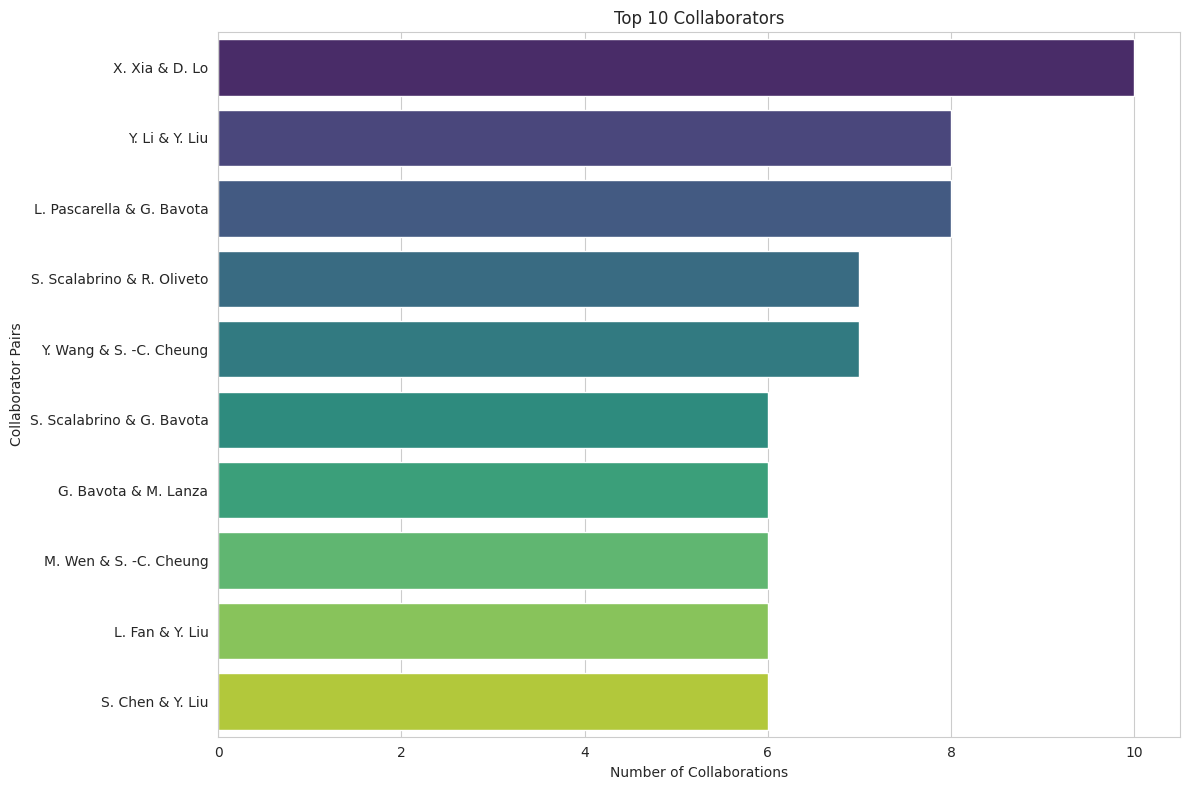

In [ ]:
import re
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
data['Authors'], data['Affiliations'] = zip(*data['Authors with Affiliations'].apply(extract_authors_affiliations))

collaboration_pairs = []

for index, row in data.iterrows():
    authors = row['Authors']
    pairs = list(combinations(authors, 2))
    collaboration_pairs.extend(pairs)

collaboration_counts = Counter(collaboration_pairs)

top_collaborators = collaboration_counts.most_common(10)

collaborator_names = [f"{pair[0]} & {pair[1]}" for pair, _ in top_collaborators]
collaboration_counts = [count for _, count in top_collaborators]

plt.figure(figsize=(12, 8))
sns.barplot(x=collaboration_counts, y=collaborator_names, palette='viridis')
plt.title('Top 10 Collaborators')
plt.xlabel('Number of Collaborations')
plt.ylabel('Collaborator Pairs')
plt.tight_layout()
plt.show()

In [ ]:
import string

def enhanced_preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize words
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join the processed tokens back into a string
    return ' '.join(processed_tokens)



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

data['Enhanced Processed Titles'] = data['Paper Title'].apply(enhanced_preprocess_text)

vectorizer_enhanced = CountVectorizer(max_df=0.85, min_df=5, max_features=1500, ngram_range=(1, 2))
X_enhanced = vectorizer_enhanced.fit_transform(data['Enhanced Processed Titles'])

num_topics_enhanced = 5
lda_model_enhanced = LatentDirichletAllocation(n_components=num_topics_enhanced, random_state=42, doc_topic_prior=0.9, topic_word_prior=0.9, max_iter=10).fit(X_enhanced)

feature_names_enhanced = vectorizer_enhanced.get_feature_names_out()
top_keywords_enhanced = get_top_keywords_for_topic(lda_model_enhanced, feature_names_enhanced, 10)

perplexity_enhanced = lda_model_enhanced.perplexity(X_enhanced)

texts_enhanced = data['Enhanced Processed Titles'].apply(nltk.word_tokenize).tolist()
dictionary_enhanced = Dictionary(texts_enhanced)
corpus_enhanced = [dictionary_enhanced.doc2bow(text) for text in texts_enhanced]
gensim_topics_enhanced = [[word for word in topic] for _, topic in top_keywords_enhanced.items()]
coherence_model_enhanced = CoherenceModel(topics=gensim_topics_enhanced, texts=texts_enhanced, dictionary=dictionary_enhanced, coherence='c_v')
coherence_enhanced = coherence_model_enhanced.get_coherence()

top_keywords_enhanced, perplexity_enhanced, coherence_enhanced


({0: ['code',
   'first',
   'api',
   'journal first',
   'journal',
   'review',
   'data',
   'engineering',
   'case',
   'developer'],
  1: ['program',
   'test',
   'automated',
   'bug',
   'repair',
   'via',
   'generation',
   'testing',
   'program repair',
   'apps'],
  2: ['learning',
   'model',
   'deep',
   'neural',
   'code',
   'network',
   'deep learning',
   'neural network',
   'testing',
   'using'],
  3: ['study',
   'analysis',
   'empirical',
   'testing',
   'empirical study',
   'application',
   'security',
   'static',
   'fuzzing',
   'web'],
  4: ['software',
   'detection',
   'system',
   'vulnerability',
   'android',
   'source',
   'library',
   'open source',
   'open',
   'development']},
 321.62911676037254,
 0.32602434806938374)

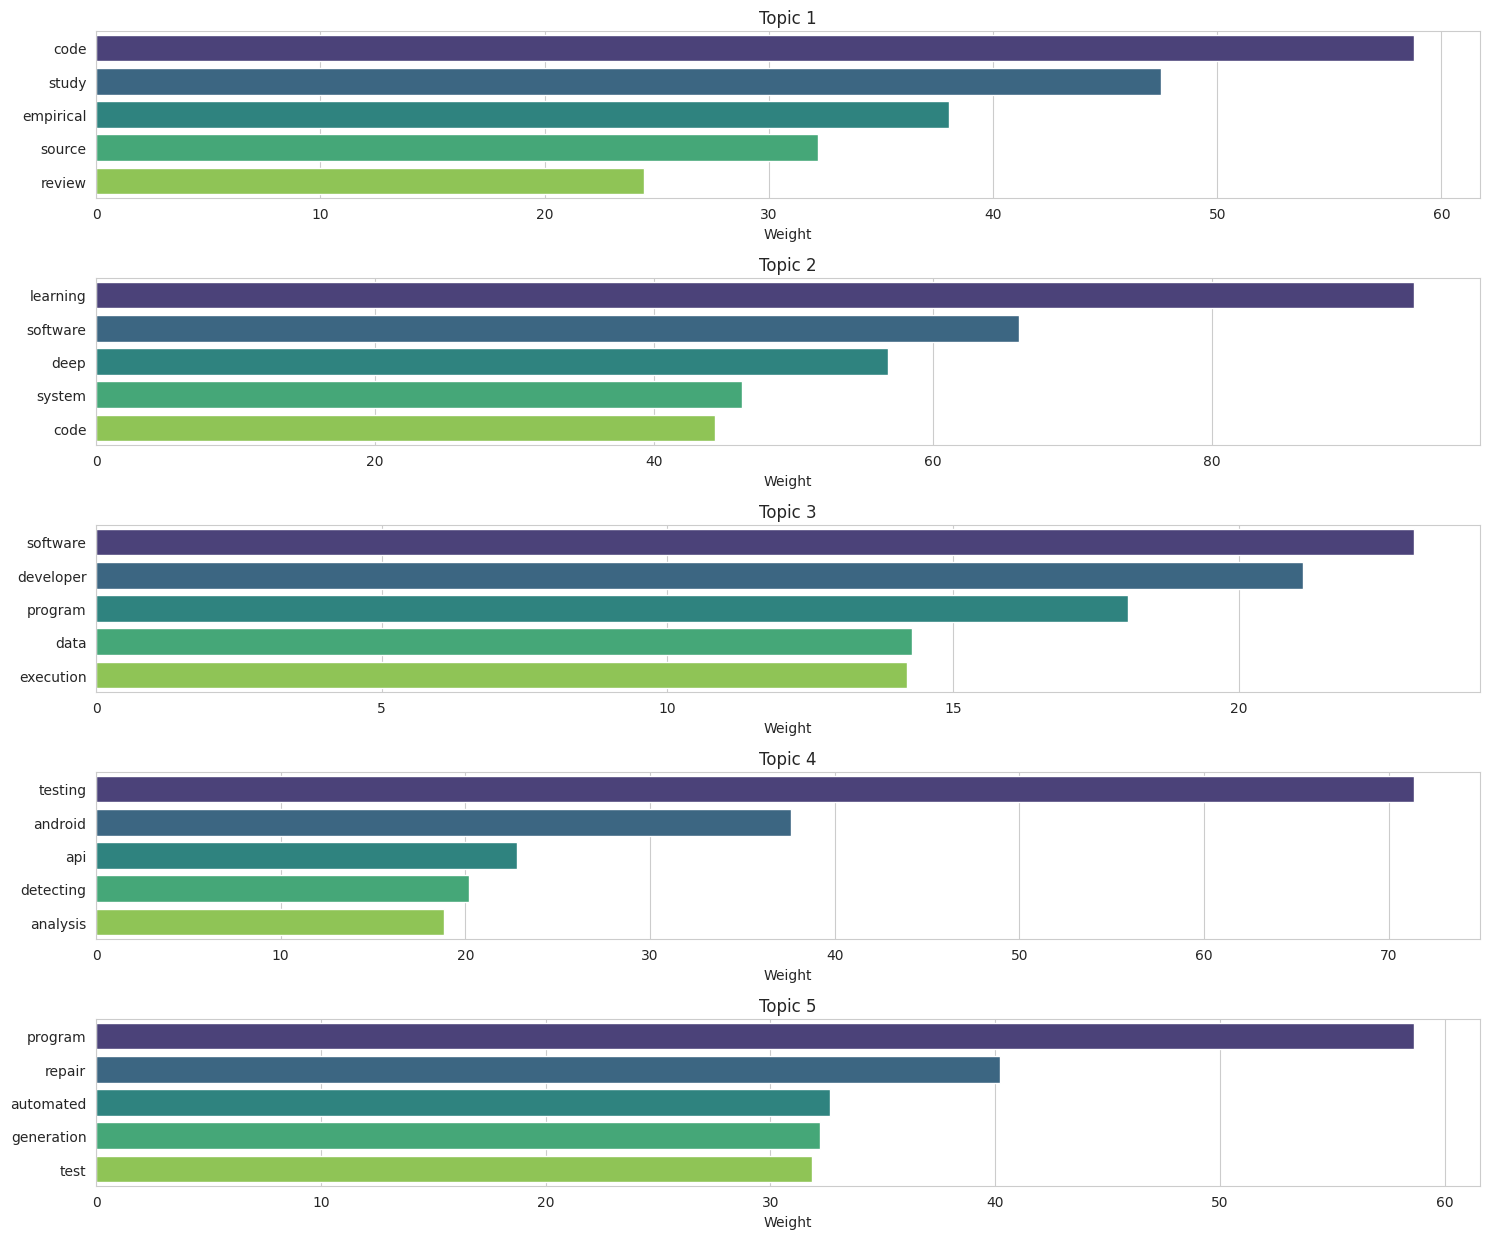

In [ ]:
num_top_words = 5

fig, axes = plt.subplots(nrows=num_topics, figsize=(15, 2.5*num_topics))

for topic_idx, topic in enumerate(lda_model.components_):
    top_features = topic.argsort()[-num_top_words:][::-1]
    top_feature_weights = topic[top_features]
    top_feature_names = [feature_names[i] for i in top_features]

    sns.barplot(x=top_feature_weights, y=top_feature_names, ax=axes[topic_idx], palette='viridis')
    axes[topic_idx].set_title(f'Topic {topic_idx + 1}')
    axes[topic_idx].set_xlabel('Weight')

plt.tight_layout()
plt.show()


In [ ]:
pdf_path = "lda_topic_keywords.pdf"
plt.savefig(pdf_path, format='pdf')
plt.close()

In [ ]:
!pip install bertopic


In [ ]:
from bertopic import BERTopic


In [ ]:

topic_model = BERTopic(language="english", calculate_probabilities=True)



In [ ]:

topics, probabilities = topic_model.fit_transform(data['Enhanced Processed Titles'])


In [ ]:

all_topics = topic_model.get_topics()


for topic_num in all_topics.keys():
    print(f"Topic {topic_num}: {topic_model.get_topic(topic_num)}\n")


Topic -1: [('software', 0.024076952767636564), ('code', 0.024056354882983563), ('study', 0.021866313662482616), ('system', 0.02033693831609936), ('automated', 0.018636171390483642), ('first', 0.01843980379999425), ('journal', 0.01789994494048837), ('learning', 0.01788030385482065), ('program', 0.016916513454036136), ('analysis', 0.01684385265374285)]

Topic 0: [('deep', 0.09104919132240478), ('test', 0.08455591359139447), ('network', 0.07133854134612859), ('testing', 0.0673357995173339), ('neural', 0.06419376228726414), ('learning', 0.06209165964669125), ('model', 0.03882168928752722), ('regression', 0.03829083722994463), ('dnn', 0.03196711434932244), ('system', 0.03176442376503519)]

Topic 1: [('android', 0.15631746940051752), ('apps', 0.11396521517488062), ('mobile', 0.07624492419580282), ('app', 0.06021804401585085), ('gui', 0.050646503765939245), ('user', 0.038648943129565246), ('analysis', 0.03673233715156904), ('application', 0.03602151430968288), ('testing', 0.033012514766764985

In [ ]:

topic_model.visualize_topics()


In [ ]:
# Extracting topics with their respective words and weights
topics = topic_model.get_topics()

# Creating labels for each topic
topic_labels = {}
for topic_num, topic_words in topics.items():
    # Selecting the top N words for each topic (e.g., top 3 words)
    label = ', '.join([word for word, _ in topic_words[:3]])
    topic_labels[topic_num] = label

# Displaying the labels for each topic
for topic_num, label in topic_labels.items():
    print(f"Topic {topic_num}: {label}")


Topic -1: software, code, study
Topic 0: deep, test, network
Topic 1: android, apps, mobile
Topic 2: symbolic, verification, performance
Topic 3: code, search, source
Topic 4: fuzzing, greybox, fuzzer
Topic 5: repair, program, patch
Topic 6: vulnerability, smart, contract
Topic 7: software, team, engineering
Topic 8: fault, localization, crash
Topic 9: api, qa, website
Topic 10: open, source, community
Topic 11: defect, prediction, crossproject
Topic 12: bug, detecting, comprehensive
Topic 13: comprehension, fmri, program
Topic 14: language, program, model
Topic 15: metamorphic, restful, apis
Topic 16: fairness, neuron, whitebox
Topic 17: log, logging, studying
Topic 18: graph, call, diagram


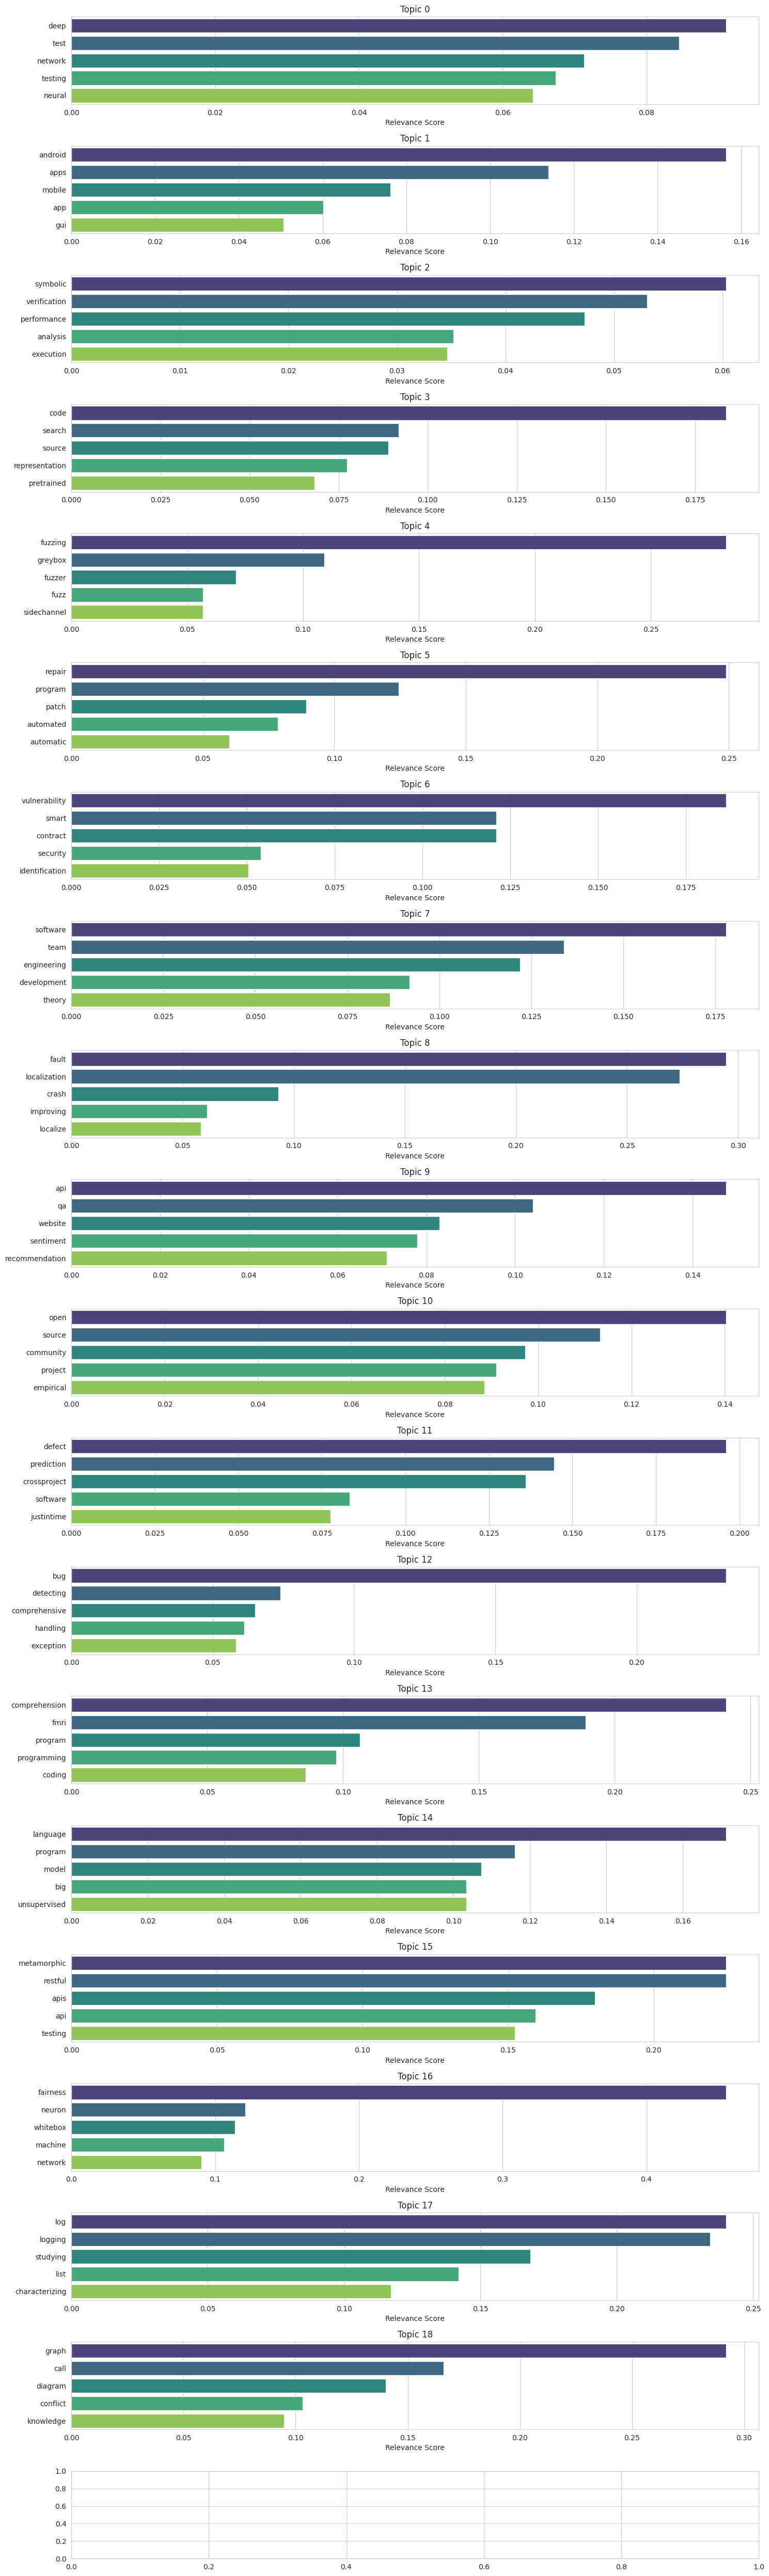

In [ ]:


# Extracting topics with their respective words and scores
topics = topic_model.get_topics()

# Number of words to display per topic
num_top_words = 5

# Number of topics
num_topics = len(topics)

# Creating subplots
fig, axes = plt.subplots(nrows=num_topics, ncols=1, figsize=(15, 2.5*num_topics))

for topic_idx, topic_words in topics.items():
    # Skip the outlier topic if present (-1)
    if topic_idx == -1:
        continue

    # Extracting top N words and their scores
    top_words = topic_words[:num_top_words]
    words, scores = zip(*top_words)

    # Plotting
    sns.barplot(x=list(scores), y=list(words), ax=axes[topic_idx], palette='viridis')
    axes[topic_idx].set_title(f'Topic {topic_idx}')
    axes[topic_idx].set_xlabel('Relevance Score')

plt.tight_layout()
plt.show()


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

texts = [nltk.word_tokenize(doc) for doc in data['Enhanced Processed Titles']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

all_topics = topic_model.get_topics()

topics_words = [[word for word, _ in all_topics[topic]] for topic in all_topics if topic != -1]

coherence_model = CoherenceModel(topics=topics_words, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()


In [ ]:
coherence_score

0.33945065892152676

In [ ]:
import networkx as nx

In [ ]:
from collections import Counter

# Count the number of collaborations for each author
collaboration_counts = Counter()
for authors in data['Authors']:
    for author in authors:
        collaboration_counts[author] += len(authors) - 1  # Exclude self in count

# Identify the top 10 authors with the most collaborations
top_10_authors = [author for author, _ in collaboration_counts.most_common(10)]

top_10_authors


['Y. Liu',
 'H. Zhang',
 'X. Zhang',
 'J. Wang',
 'L. Zhang',
 'Y. Wang',
 'Y. Li',
 'S. Wang',
 'Z. Chen',
 'J. Chen']

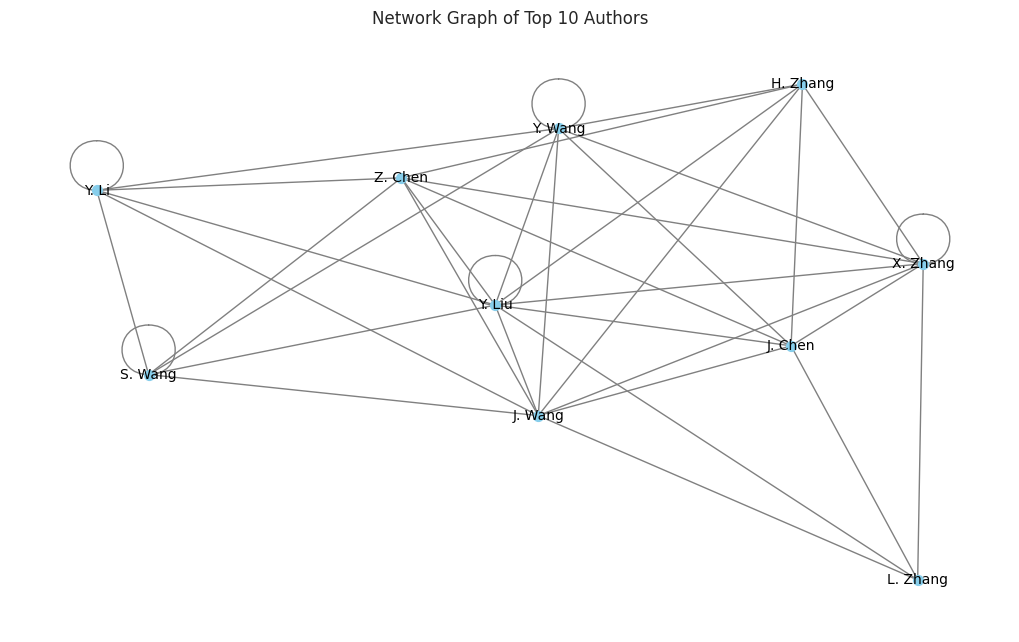

In [ ]:
# Create a network graph for authors only
G_authors = nx.Graph()

# Iterate through each row in the dataset
for _, row in data.iterrows():
    authors = row['Authors']

    # Check if any of the authors in the row is in the top 10 and add them and their co-authorship
    if any(author in top_10_authors for author in authors):
        for author in authors:
            if author in top_10_authors:
                G_authors.add_node(author, type='author')

        # Add edges for co-authorship
        for author_pair in combinations(authors, 2):
            if author_pair[0] in top_10_authors and author_pair[1] in top_10_authors:
                G_authors.add_edge(*author_pair, type='coauthorship')

# Plot the network graph for authors only
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G_authors, k=0.15, iterations=20)
nx.draw(G_authors, pos, with_labels=True, node_color='skyblue', edge_color='gray', font_size=10, node_size=50)
plt.title('Network Graph of Top 10 Authors')
plt.show()
